# Занятие 2.4

## Аннотация
Четвертое занятие посвящено множествам и операциями с ними в Python.

## 1. Cоздание множества

### Об устройстве коллекций

Теперь мы переходим к изучению более продвинутых коллекций в Python, из которых мы уже знаем списки (list), кортежи (tuple), строки (str) и диапазоны (range). Но сначала рассмотрим внутреннюю иерархию этих коллекций для лучшего понимания.

Коллекция — это объект, который одновременно является *контейнером*, *итерируемым объектом* и *объектом ограниченной длины*.

Начнем по порядку. Объект считается контейнером (Container), если у него можно спросить, содержит ли он произвольный элемент **X** с помощью оператора in (правда бывают исключения). Итератором (Iterable) считается объект с методами `__next__` и `__iter__`. Объект считается объектом ограниченной длины (Sized), если у него можно спросить количество элементов функцией len().

Разработчики языка Python смотрят на эту иерархию понятий как на иерархию классов, где абстрактный класс `Collection` наследуется от всех трех выше обозначенных абстрактных классов: `Container`, `Iterable` и `Sized`.

![Картинка](https://fadeevlecturer.github.io/python_lectures/_images/collections_venn.svg)
![Alt text](https://fadeevlecturer.github.io/python_lectures/_images/collections_hierarchy.svg)

Мы можем сами убедиться в такой иерархии с помощью функции issubclass():

In [ ]:
from collections.abc import Collection, Container, Iterable, Sized

print(issubclass(Collection, Container))
print(issubclass(Collection, Iterable))
print(issubclass(Collection, Sized))

True
True
True


Дальнейшая классификация коллекций обычно производится по способу получения доступа к элементам. Это последовательности (Sequence), отображения (Mapping), множества (Set) и другие.

**Внимание**. Все рассуждения выше основаны на такой особенности языка Python, как "утиная типизация". В программировании это выражается в виде "утиного теста":  
`If it looks like a duck, swims like a duck, and quacks like a duck, then it probably is a duck`.  
То есть, например, если что-то выглядит как итератор и реагирует как итератор, это и есть итератор. И т.д.  
Ссылка на описание "утиной типизации" в официальной документации: https://docs.python.org/3/glossary.html#term-duck-typing

### Cоздание множества в Python

Вернемся к множествам.

Множество в Python — это **неупорядоченная** коллекция **уникальных** элементов. Множества изменяемы и чаще всего используются для удаления дубликатов и всевозможных проверок на вхождение. В Python множества представлены типом данных **set**.

Кстати, с помощью той же функции issubclass() мы можем убедиться, что множество это действительно класс-наследник коллекций:

In [ ]:
print(issubclass(set, Collection))

True


А раз множество является коллекцией, то мы можем поискать в нём элемент, пройтись в цикле или посчитать размер, как с любой коллекцией. Но об этом позже.

Чтобы задать множество, нужно в фигурных скобках перечислить его элементы.
Создадим множество из четырех элементов (названий животных) и выведем на экран:

In [ ]:
animals = {'cat', 'dog', 'fox', 'wolf'}
print(animals)

{'wolf', 'cat', 'fox', 'dog'}


После запуска видим иной порядок, чем мы задали. Так происходит потому, что элементы в множестве Python не упорядочены.

Для создания пустых множеств обязательно вызывать функцию `set` (так как скобки {} зарезервированы для создания пустых словарей):

In [ ]:
empty = set()

print(type(empty))

<class 'set'>


Множество может содержать и строки, и числа:

In [ ]:
animals_and_nums = {'cat', 5, 'dog', 4, 'fox', 3, 'wolf', 2}
print(animals_and_nums)

{2, 3, 4, 'fox', 5, 'wolf', 'cat', 'dog'}


 Обратите внимание, что Python опять выводит элементы множества в случайном порядке.

 Кроме того, множество можно создать и списочным выражением:

In [ ]:
my_new_set = {i for i in range(2, 20, 2)}
print(my_new_set)

{2, 4, 6, 8, 10, 12, 14, 16, 18}


Особенностью множества является то, что один  и тот же элемент **не может** входить в множество несколько раз.
Элементы не упорядочены и нет возможности отличить один элемент от другого. Поэтому множество содержит только уникальные элементы, что делает его удобным инструментом для удаления дубликатов и проверок на вхождение.

In [ ]:
animals = {'cat', 'cat', 'cat', 'dog', 'fox', 'wolf'}
print(animals)

{'wolf', 'cat', 'fox', 'dog'}


Посмотрим на следующий пример:

In [ ]:
numbers = {7, 7.0}
print(numbers)

{7}


In [ ]:
print(7 == 7.0)

True


Поскольку в Python 7 == 7.0, то соблюдаяя тот самый принцип уникальности элементов интерпретатор считает целые и вещественные числа равными. Если необходимо строго различать целые и вещественные числа, можно использовать другую структуру данных, такую как список или кортеж, где типы данных будут сохраняться. Либо хранить значения чисел в формате строк.

Python основывает сравнение элементов в множестве на их хэш-значениях. О хеш-значениях и хеш-функциях поговорим на следующем занятии.

**Итак**, у множеств есть следующие ключевые особенности:

* Порядок элементов в множестве не определен.
* К элементам множества нет доступа по номеру, нельзя делать срезы.
* Элементы множеств — строки и/или числа.
* Множество не может содержать одинаковых элементов.


## 2. Операции (методы) над одним множеством
Вот основные операции над множеством в Python:
* **len(elem)** вычисляет число элементов множества.
* **add(elem)** добавляет элемент в множество.
* **remove(elem)** удаляет элемент из множества, а если удаляемого элемента в множестве нет, возвращает ошибку.
* **discard(elem)** удаляет элемент из множества, если этот элемент там есть.
* **pop()** удаляет и возвращает произвольный элемент множества, а если множество пустое, возвращает ошибку.
* **clear()** удаляет все элементы из множества.
* **copy()** создаёт копию множества.

Далее рассмотрим эти операции на примерах.

#### Вычисление числа элементов множества (len)

Метод работает точно так же, как и со списком.

In [ ]:
my_set = {'a', 'b', 'c'}
n = len(my_set)
print(n)

3


Количество элементов множества так же называется его **мощностью**.

#### Добавление элемента в множество (add)

Если новый элемент уже существует в множестве, оно не изменится, поскольку не может содержать одинаковых элементов. Ошибки при этом не произойдет.

In [ ]:
my_set = set()
my_set.add('a')
my_set.add('b')
my_set.add('a')
print(my_set)

{'a', 'b'}


#### Удаление элемента

Для удаления есть три метода:
* discard — удалить заданный элемент, если он есть в множестве, и ничего не делать, если его нет;
* remove — удалить заданный элемент, если он есть, и породить ошибку KeyError, если нет;
* pop — удалить некоторый элемент из множества и возвратить его как результат.

In [ ]:
my_set = {'a', 'b', 'c', 'd'}
my_set.discard('a')      # будет удален
my_set.discard('boom')   # нет в множестве, ничего не делать
print(my_set)

{'b', 'c', 'd'}


In [ ]:
my_set.remove('b')       # будет удален
print(my_set)

{'c', 'd'}


In [ ]:
my_set.remove('game')    # не в множестве, вызовет ошибку KeyError

KeyError: ignored

In [ ]:
elem = my_set.pop() # удаляет из множества случайный элемент и возвращает его значение
print(elem)
print(my_set)

c
{'d'}


#### Очистка множества (clear)

Очистить множество от всех элементов можно с помощью метода clear:

In [ ]:
my_set.clear()
print(my_set)

set()


#### Копирование множества (copy)

Поскольку множества — это изменяемые объекты, они доступны для редактирования по ссылке. Рассмотрим пример:

In [ ]:
b = {3, 2}
print(id(b))
d = b
print(id(d))
d.add(7)
print(b)

134757207324288
134757207324288
{2, 3, 7}


Мы видим, что b и d представляют собой ссылку на один и тот же объект. И при добавление в множество b одного элемента, он естественно попадает и в множество d.  
Поэтому, если нам надо работать с настоящией копией какого-то множества, нужно использовать метод **copy**:

In [ ]:
b = {2, 3}
print(id(b))
d = b.copy()
print(id(d))
d.add(7)
print(b, d)

133618063748320
133618063746752
{2, 3} {2, 3, 7}


Видно, что действительно создался новый объект и его изменения не затрагивают оригинал.

### Обход множества и проверка наличия элемента

Принцип обхода множества в Python точно такой же, как и списком. Например, можно сделать это с помощью цикла for:

In [ ]:
my_set = {'a', 'b', 'c'}
for i in my_set:
    print(i)

a
b
c


Проверка наличия элемента в списке осуществляется с помощью того же оператора in:

In [ ]:
if 'b' in my_set:
    print("Я нашел его!")
else:
    print("Такого элемента нет")

Я нашел его!


## 3. Операции над двумя множествами

Как и в линейной алгебре, два множества в Python подвержены различным операциям, таких как объединение, разность или сравнение множеств. Все доступные операции приведены в таблице.

Эти операции могут быть полезными при выполнении различных задач, таких как фильтрация данных, удаление дубликатов, анализ пересечения и разницы между наборами данных и другие манипуляции с данными.

Ниже рассмотрим самые популярные операции из них на примерах.

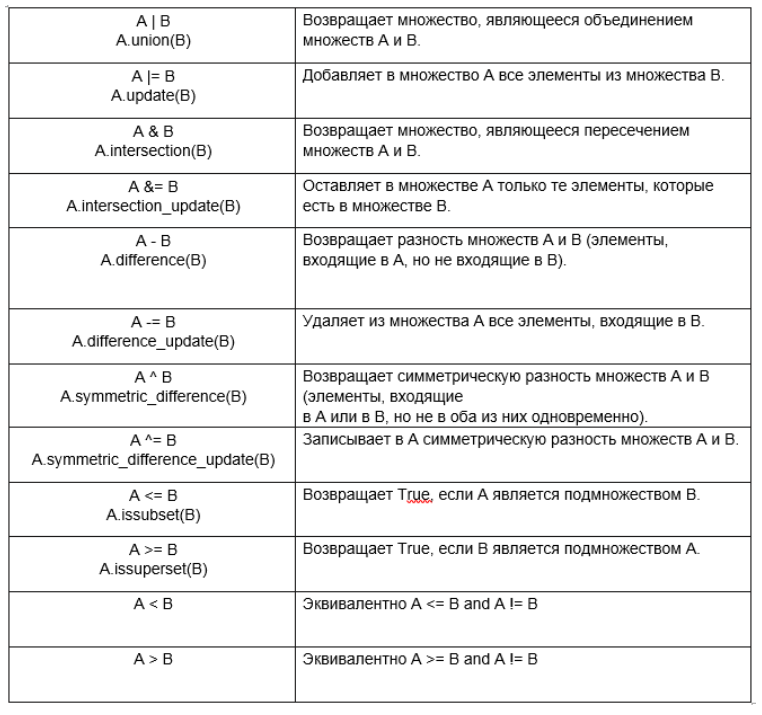

#### Использование операций объединения, пересечения, разности и симметрической разности

Чтобы лучше понять принципы работы с множествами, используются следующие картинки. В них множества условно представлены двумя кругами. Результаты пересечения или объединения множеств выражаются в виде закрашенной площади.

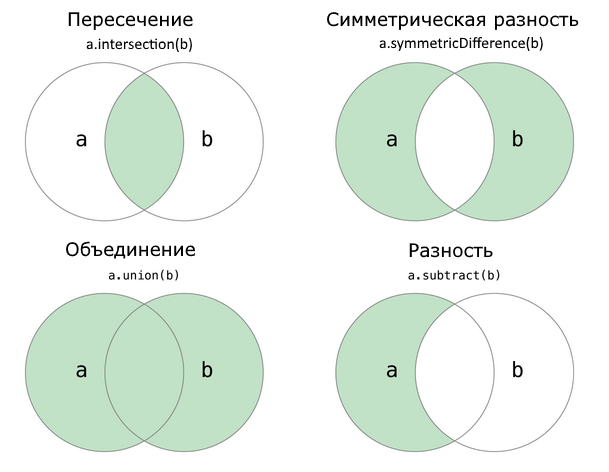

Теперь посмотрим, как это работает на множествах в Python.  
Обратите внимание, для вычисления результата можно использовать как методы, так и операции:

In [ ]:
m1 = {'a', 'b', 'c'}
m2 = {'a', 'c', 'd'}
union = m1.union(m2)  # метод
intersection = m1.intersection(m2)  # метод
diff = m1 - m2        # операция
symm_diff = m1 ^ m2   # операция

print("Объединение: ", union)
print("Пересечение: ", intersection)
print("Разность: ", diff)
print("Симметрическая разность: ", symm_diff)

Объединение:  {'a', 'd', 'b', 'c'}
Пересечение:  {'a', 'c'}
Разность:  {'b'}
Симметрическая разность:  {'b', 'd'}


### Сравнение множеств

Для сравнения множеств используются все логические операторы: <b> ==, <, >, <=, >=</b>. Равными будут считаться множества с одинаковым набором элементов. Операторы сравнения возвращают результат <b>True</b>, если сравнение истинно, и <b>False</b> — если нет.

In [ ]:
m1 = {'a', 'b', 'c'}
m2 = {'a', 'c', 'd'}
m1 >= m2  # для истинности m1 должно содержать те же элементы, что и m2, и возможно ещё какие-то

False

### Пример 1
Создать список из 20 случайных целых чисел от 1 до 5 и удалить из списка повторяющиеся элементы.

In [ ]:
from random import randint

arr = [randint(1, 5) for i in range(20)]  # создаем список случайных чисел
arr_no_dupl = set(arr)  # передаем список функции set(), все дубли будут удалены автоматически
arr_no_dupl = list(arr_no_dupl)  # передаем в функцию list(), чтобы снова сделать список

print(f'Исходный список: {arr}')
print(f'Список без дубликатов: {arr_no_dupl}')

Исходный список: [2, 2, 2, 1, 3, 5, 1, 1, 1, 3, 1, 5, 5, 4, 3, 1, 4, 4, 3, 2]
Список без дубликатов: [1, 2, 3, 4, 5]


### Пример 2. Оптимизации алгоритма с помощью множества

Вам дан массив целых чисел. Верните два таких числа в массиве, которые образуют в сумме поданное на вход число. Повторно использовать один и тот же элемент нельзя.
```
Вход:  nums = [3, 8, 10, 16], target = 26  
Выход: [10, 16]
```

Решение полным перебором:

In [ ]:
# Решение O(N*N)
def summ(nums, target):
    dlina = len(nums)
    for i in range(len(nums)):
        for j in range(i + 1, dlina):
            if nums[i] + nums[j] == target:
                return [nums[i], nums[j]]

nums = [3,8,10,16]
target = 26
print(summ(nums, target))

[10, 16]


Решение с использованием свойств множества:

In [ ]:
# Решение O(N)
def summ(nums, target):
    my_set = set()
    my_set.add(nums[0])
    for num in nums[1:]:
        if target - num in my_set:      # Такой поиск в множестве, в отличие от списка, имеет сложность O(1)
            return [num, target - num]
        else:
            my_set.add(num)

nums = [3,8,10,16]
target = 26
print(summ(nums, target))

[16, 10]


### Вывод
**Итак**, множество это тип коллекций в Python, которое задаётся в помощью функции set() или фигурных скобок.  
Множества полезны, когда вам нужно выполнить разные алгебраические операции над множествами (например, объединение, пересечение), и при этом вам не важен порядок элементов.  
Они также могут быть использованы для удаления дубликатов из списка или строки, простой проверки на уникальность элементов и других задач, связанных с уникальными значениями.